
# Linear Regression

Congratulations! You just got some contract work with an Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

** 1. Read in the Ecommerce Customers csv file as a DataFrame called customers. __5pts__**

In [3]:
customers = pd.read_csv('./Ecommerce.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
#Hint: describe()
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**2. Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**
5pts

/home/daotran/Projects/CoderSchool/D1/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


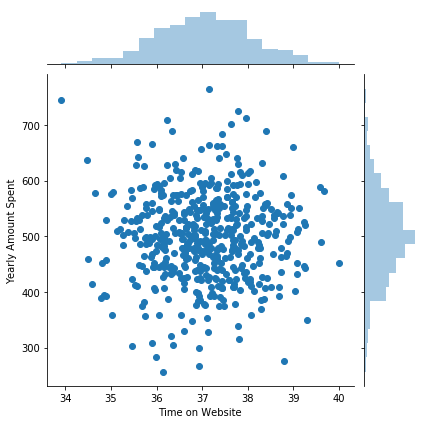

In [26]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers[['Time on Website', 'Yearly Amount Spent']])


** 3. Do the same but with the Time on App column instead. **
5pts

/home/daotran/Projects/CoderSchool/D1/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


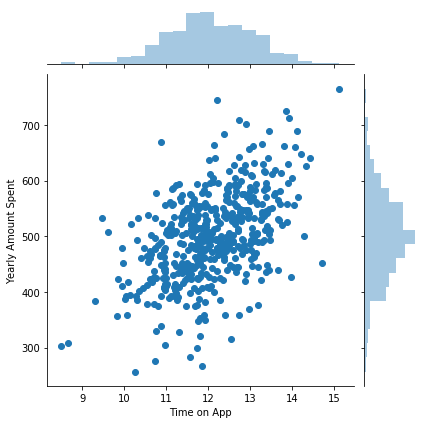

In [27]:
sns.jointplot(x=customers['Time on App'], y=customers['Yearly Amount Spent'])

** 4. Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**
5pts

keyword: seaborn, jointplot, kind='hex'

/home/daotran/Projects/CoderSchool/D1/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


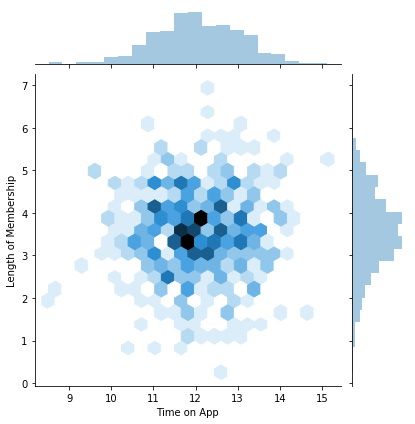

In [52]:
sns.jointplot(x=customers['Time on App'], y=customers['Length of Membership'], kind='hex')

**5. Let's explore correlation across the entire data set. Use [heatmap](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/) to create the chart which represents correlation between each columns.(Don't worry about the the colors)**
5pts

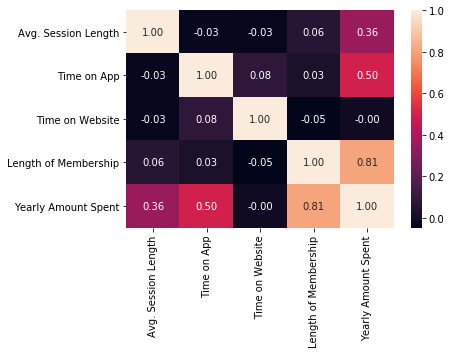

In [53]:
# Optional
# Hint: pandas.corr(), sns.heatmap
sns.heatmap(customers.corr(), annot=True, fmt=".2f")

**6. Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**
5pts

In [63]:
customers.corr()['Yearly Amount Spent'].nlargest(2)[1]

0.8090835682475818

**7. Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **
5pts

/home/daotran/Projects/CoderSchool/D1/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


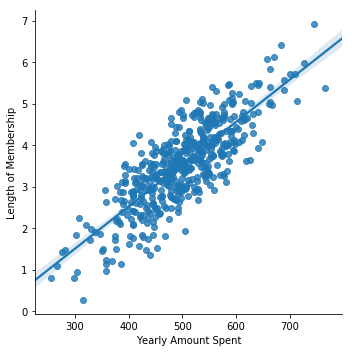

In [64]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=customers[['Yearly Amount Spent', 'Length of Membership']])

In [66]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Training and Testing Data

**8.** Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **
5pts

In [73]:
from sklearn.model_selection import train_test_split
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

**9. Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**
5pts

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**10. Import LinearRegression from sklearn.linear_model **
5pts

In [81]:
from sklearn.linear_model import LinearRegression

**11. Create an instance of a LinearRegression() model named lm.**
5pts

In [83]:
lm = LinearRegression()

**12. Train/fit lm on the training data.**
5pts

In [97]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train)
poly_reg.fit(X_test)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
lm.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**13. Print out the coefficients of the model**
5pts

In [98]:
# Hint: coef_
lm.coef_

array([ 1.36796122e-02,  5.54919310e+03,  4.41839712e+04, -1.55948666e+04,
       -9.60976332e+03, -5.08826342e+02, -7.76352714e+02,  4.58873205e+02,
        2.21771768e+03,  1.28583248e+03, -3.56152075e+03, -1.53895800e+03,
        1.00517590e+03, -6.06541357e+02, -4.66004120e+02, -5.81617875e+00,
        1.76428288e+01,  4.10152851e+01, -3.75489435e+01, -1.73511246e+01,
        1.42902567e+01,  8.75131753e+01, -4.60472004e+01, -8.91651836e+01,
        3.41282938e+01,  4.08726312e+00, -5.96916595e+01,  2.36702779e+01,
        1.09280894e+02, -2.25305907e+01,  6.77267959e+01, -1.79127556e+01,
        6.26709678e+01, -2.49327783e+01, -6.56260449e+00,  1.38829633e-01,
        2.40914092e-01, -4.19060844e-01,  1.32172467e-02, -1.08508834e-01,
       -9.41502950e-01, -1.13844527e+00,  8.64044909e-02,  1.50282326e+00,
       -6.96883470e-01,  4.51795373e-02,  6.21432982e-01, -5.98930171e-02,
        4.30235284e-01,  9.70135493e-02, -2.20101575e+00,  3.17031870e-01,
       -2.40048685e-01,  

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**14. Use lm.predict() to predict off the X_test set of the data.**
5pts

In [102]:
prediction = lm.predict(X_test_poly)

**15. Create a scatterplot of the real test values versus the predicted values. **
5pts

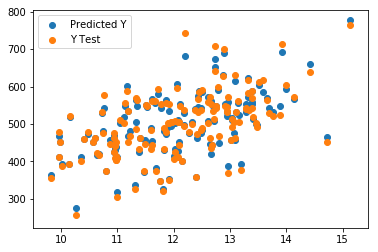

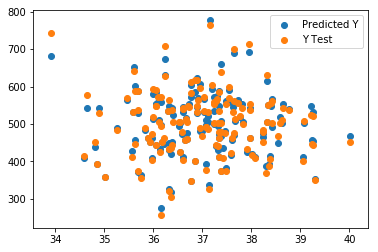

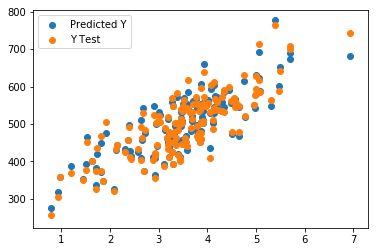

In [124]:
plt.scatter(X_test['Time on App'], prediction, label='Predicted Y')
plt.scatter(X_test['Time on App'], y_test, label='Y Test')
plt.legend()
plt.show()
plt.scatter(X_test['Time on Website'], prediction, label='Predicted Y')
plt.scatter(X_test['Time on Website'], y_test, label='Y Test')
plt.legend()
plt.show()
plt.scatter(X_test['Length of Membership'], prediction, label='Predicted Y')
plt.scatter(X_test['Length of Membership'], y_test, label='Y Test')
plt.legend()
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares.

**16. Calculate: Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**
10pts

Note: Refer to those links for the formulas

[Mean Absolute Error(MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)

[Mean Squared Error(MSE)](https://en.wikipedia.org/wiki/Mean_squared_error)

[Root Mean Squared Error(RMSE)]()

Reference

[MAE and RMSE](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

print('MAE: {}'.format(mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(sqrt(mean_squared_error(y_test, prediction))))

MAE: 9.00700739606655
MSE: 149.61130874246876
RMSE: 12.231570166682149


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**17. Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**
10pts

/home/daotran/Projects/CoderSchool/D1/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


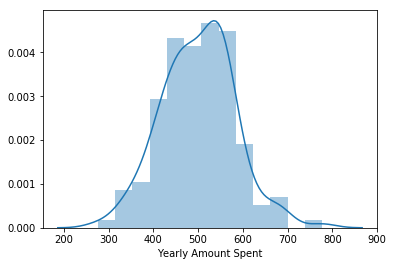

In [125]:
sns.distplot(prediction, axlabel='Yearly Amount Spent')

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**18. Recreate the dataframe below. **
10pts

In [180]:
avg_session_length = customers.corrwith(customers['Yearly Amount Spent'])['Avg. Session Length']
time_on_app = customers.corrwith(customers['Yearly Amount Spent'])['Time on App']
time_on_website = customers.corrwith(customers['Yearly Amount Spent'])['Time on Website']
length_of_membership = customers.corrwith(customers['Yearly Amount Spent'])['Length of Membership']

raw_data = {'Coeffecient': [avg_session_length, time_on_app, time_on_website, length_of_membership]}
df = pd.DataFrame(raw_data, index = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'])
df

,Coeffecient
Avg. Session Length,0.355088
Time on App,0.499328
Time on Website,-0.002641
Length of Membership,0.809084


**19. How can you interpret these coefficients? **
10pts

The yearly amount spent is tending to depend on the length of membership

**20. Do you think the company should focus more on their mobile app or on their website?**
10pts

Seem to be that the customer spent there time more on the website, for the mobile app, just a half, but the amount they spent is the same. So the company should focus more on their mobile app.

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.